<a href="https://colab.research.google.com/github/Siddharth131020/Machine-learning/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install ann_visualizer


  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4167 sha256=9ac390ca9a1f4be36b4dcfaa337c37734a6a4e1877adb501ee19ca87d5464de6
  Stored in directory: /root/.cache/pip/wheels/6e/0f/ae/f5dba91db71b1b32bf03d0ad18c32e86126093aba5ec6b6488
Successfully built ann_visualizer


In [3]:
from keras.datasets import boston_housing


In [4]:
(train_set_x, train_set_y), (test_set_x, test_set_y) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [5]:
print(train_set_x.shape, train_set_y.shape, test_set_x.shape, test_set_y.shape)

(404, 13) (404,) (102, 13) (102,)


In [6]:
from sklearn.preprocessing import MinMaxScaler


In [7]:
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(train_set_x)


MinMaxScaler()

In [8]:
train_set_x = min_max_scaler.fit_transform(train_set_x)
test_set_x = min_max_scaler.fit_transform(test_set_x)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [10]:

model = Sequential(name = 'ANN_Boston_Housing_Price_Prediction')
model.add(Dense(200, input_dim = train_set_x.shape[1], activation = 'relu', name = 'Input_layer')) #output of first layer=200, have to mention the input of the first layer (number of features)
model.add(Dense(150, activation = 'relu', name = 'Hidden_layer_1')) #not flexible like pytorch. Ek ke baad dusra join hoga (Sequential), so don't need to mention input of hidden layers
model.add(Dense(100, activation = 'relu', name = 'Hidden_layer_2'))
model.add(Dense(50, activation = 'relu', name = 'Hidden_layer_3'))
model.add(Dense(1, activation = 'linear', name = 'Output_layer')) #by default relu, so need to mention. we don't need any activation in the last layer in this dataset


In [11]:
model.compile(optimizer='Adam', loss='mse', metrics=['mae'])

In [12]:
model.summary() # none because of different batch size


Model: "ANN_Boston_Housing_Price_Prediction"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 200)               2800      
                                                                 
 Hidden_layer_1 (Dense)      (None, 150)               30150     
                                                                 
 Hidden_layer_2 (Dense)      (None, 100)               15100     
                                                                 
 Hidden_layer_3 (Dense)      (None, 50)                5050      
                                                                 
 Output_layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 53,151
Trainable params: 53,151
Non-trainable params: 0
_________________________________________________________________


In [13]:
hist = model.fit(train_set_x, train_set_y, batch_size=40, epochs = 100, validation_split=0.2)


Epoch 1/100
9/9 [==============================] - 2s 36ms/step - loss: 541.7767 - mae: 21.3625 - val_loss: 556.9094 - val_mae: 21.6330
Epoch 2/100
9/9 [==============================] - 0s 10ms/step - loss: 420.7382 - mae: 18.0856 - val_loss: 329.8397 - val_mae: 15.1662
Epoch 3/100
9/9 [==============================] - 0s 10ms/step - loss: 194.3508 - mae: 10.9807 - val_loss: 146.1935 - val_mae: 9.5677
Epoch 4/100
9/9 [==============================] - 0s 11ms/step - loss: 139.0432 - mae: 9.2376 - val_loss: 117.9971 - val_mae: 8.3249
Epoch 5/100
9/9 [==============================] - 0s 12ms/step - loss: 105.4976 - mae: 7.5428 - val_loss: 108.7036 - val_mae: 7.5548
Epoch 6/100
9/9 [==============================] - 0s 14ms/step - loss: 79.2380 - mae: 6.3354 - val_loss: 71.7075 - val_mae: 6.3610
Epoch 7/100
9/9 [==============================] - 0s 13ms/step - loss: 65.7768 - mae: 5.9847 - val_loss: 62.6953 - val_mae: 5.5188
Epoch 8/100
9/9 [==============================] - 0s 14ms/st

In [14]:
hist.history


{'loss': [541.7767333984375,
  420.7381896972656,
  194.35076904296875,
  139.04322814941406,
  105.49759674072266,
  79.23800659179688,
  65.77676391601562,
  55.3377799987793,
  52.33418273925781,
  48.73119354248047,
  42.54805374145508,
  39.5545654296875,
  35.89796447753906,
  31.90472412109375,
  29.333431243896484,
  26.688465118408203,
  24.586530685424805,
  23.025972366333008,
  21.50461769104004,
  20.936260223388672,
  20.54907989501953,
  19.206586837768555,
  18.208675384521484,
  17.655162811279297,
  19.041086196899414,
  19.463878631591797,
  17.559354782104492,
  16.704214096069336,
  15.315471649169922,
  15.131538391113281,
  15.226892471313477,
  14.592881202697754,
  14.055421829223633,
  14.131536483764648,
  13.61944580078125,
  12.742973327636719,
  12.610615730285645,
  12.785944938659668,
  14.330534934997559,
  14.06348705291748,
  17.108701705932617,
  13.355934143066406,
  12.27897834777832,
  11.380642890930176,
  10.890531539916992,
  11.497822761535645

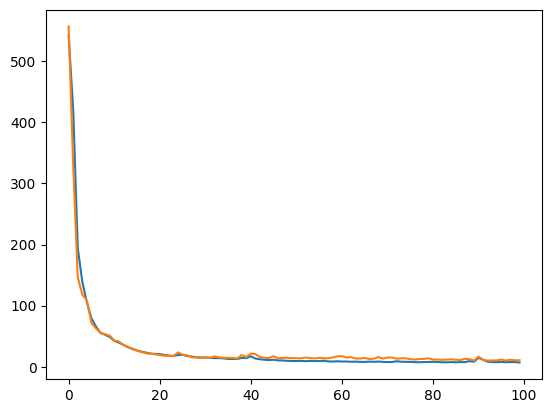

In [15]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

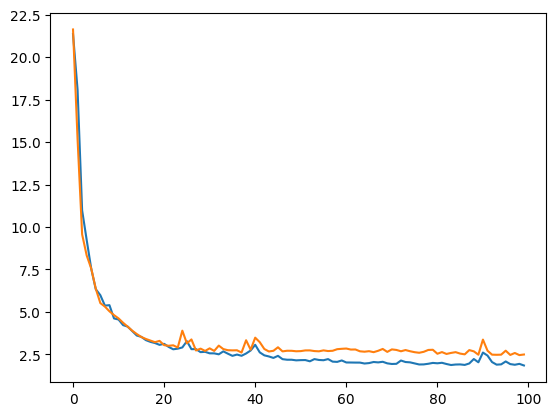

In [16]:
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])

In [17]:
from ann_visualizer.visualize import ann_viz


In [18]:
ann_viz(model, filename='filename.gv')


In [19]:
import graphviz

In [20]:
viz = graphviz.Source.from_file('filename.gv')

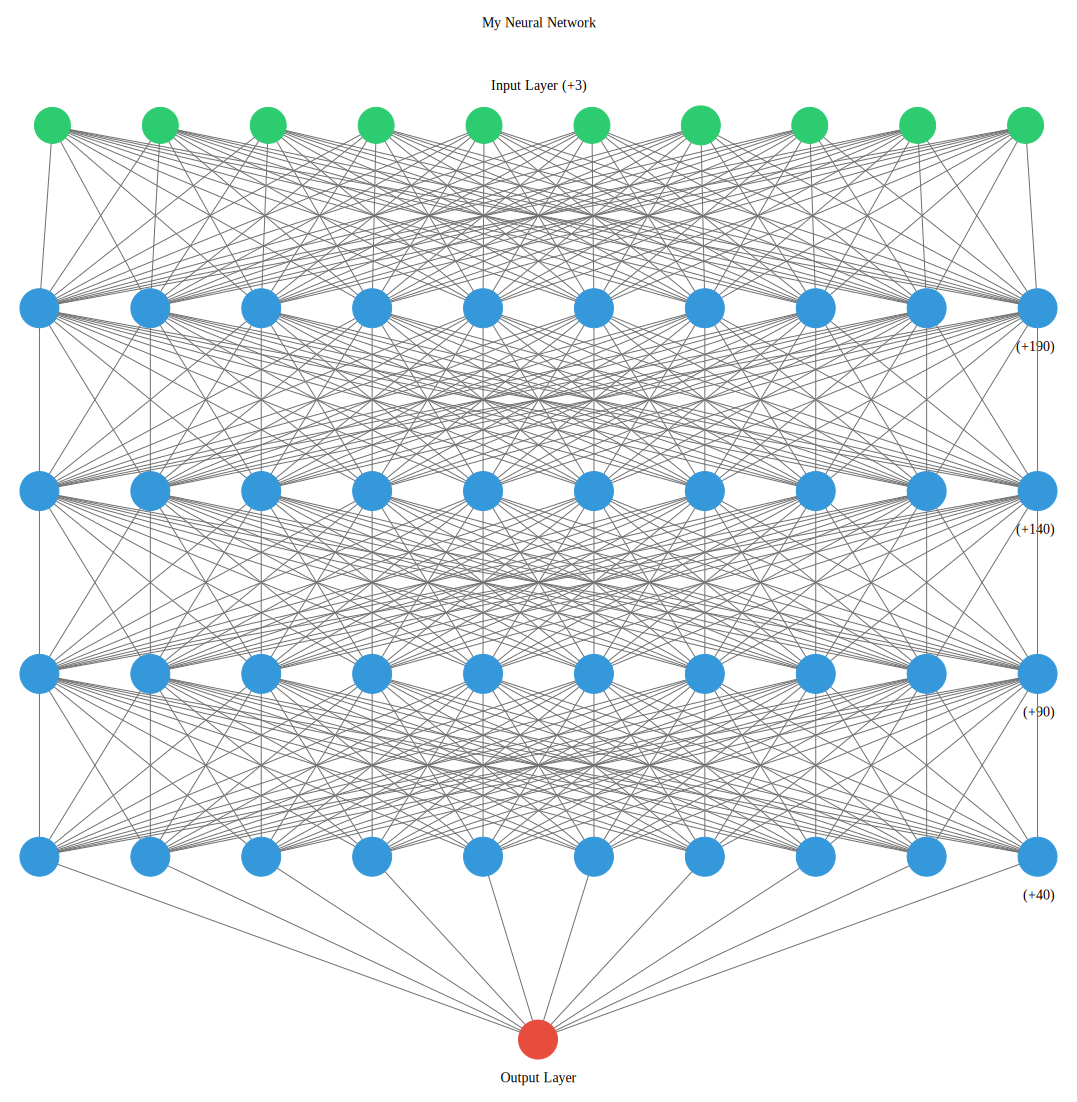

In [21]:
viz

In [22]:
test_results = model.evaluate(test_set_x, test_set_y)


4/4 [==============================] - 0s 4ms/step - loss: 42.6408 - mae: 5.2315


In [23]:
predicted_results = model.predict(test_set_x)


4/4 [==============================] - 0s 4ms/step


In [24]:

for i in range(len(predicted_results)):
  print(f"Predicted: {predicted_results[i]}, Actual: {test_set_y[i]}")

Predicted: [8.627212], Actual: 7.2
Predicted: [14.172655], Actual: 18.8
Predicted: [17.114515], Actual: 19.0
Predicted: [26.41555], Actual: 27.0
Predicted: [18.7302], Actual: 22.2
Predicted: [15.555361], Actual: 24.5
Predicted: [24.855875], Actual: 31.2
Predicted: [17.658638], Actual: 22.9
Predicted: [15.376965], Actual: 20.5
Predicted: [16.354225], Actual: 23.2
Predicted: [11.792181], Actual: 18.6
Predicted: [13.599621], Actual: 14.5
Predicted: [14.117223], Actual: 17.8
Predicted: [37.208584], Actual: 50.0
Predicted: [11.700024], Actual: 20.8
Predicted: [16.170408], Actual: 24.3
Predicted: [21.034548], Actual: 24.2
Predicted: [17.350042], Actual: 19.8
Predicted: [13.417343], Actual: 19.1
Predicted: [27.016264], Actual: 22.7
Predicted: [8.850859], Actual: 12.0
Predicted: [9.885173], Actual: 10.2
Predicted: [15.315212], Actual: 20.0
Predicted: [11.595598], Actual: 18.5
Predicted: [17.551222], Actual: 20.9
Predicted: [18.647049], Actual: 23.0
Predicted: [26.01666], Actual: 27.5
Predicted